---
## Step 0: Load The Data

In [1]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import albumentations as albu
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

# Model configuration
batch_size = 128
loss_function = 'mean_squared_error'
optimizer = Adam()
validation_split = 0.2
verbosity = 1

import cv2
import numpy as np
import pandas as pd
from keras.preprocessing import image


# import thumbnail image (model1 input)
img_list = pd.read_csv('YT_output.csv')    #, nrows=1182
num_img = img_list.shape[0]

# data_train = []
# #data_train = np.empty(num_img, dtype=int)
#
# print(num_img)
# for i in range(0, num_img):
#     file_name = img_list['subscriberCount'][i]
#     # img = image.load_img("download_image\%s.jpg" % file_name, target_size=(360, 480))
#     try:
#         if '=' in file_name:
#             file_name = file_name.replace('=','')
#             print(file_name)
#     except:
#         pass
#     img = cv2.imread('download_image\%s.jpg' % file_name)
#     img = img[80:280, 0:480]
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     data_train.append(img)
#     #data_train[i] = cv2.imread('download_image\%s.jpg' % file_name)
#
# print("img:",img.shape)
# print("img:",type(img))
# # Determine shape of the data
# input_shape = img.shape
# input_train = np.array(data_train)
target_train = np.array(pd.read_csv('PopularityScore.csv')).astype('float32')

C:\Users\crazy\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\crazy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\crazy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\crazy\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# compile model 2
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import EfficientNetB0
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate, Input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,Bidirectional
from _title import title_train

input_train = title_train()

27
mixed_data len is 3565
1670508000
(3565, 1, 102)
27
mixed_data len is 3565
1670508000
(3565, 1, 102)


In [3]:
# model2_in = Input(shape = input_shape2)
# model2_out_L1 = Dense(32, input_dim=10,input_shape=n_features)(model2_in)
# model2_out_L2 = Bidirectional(LSTM(50, activation='relu'))(model2_out_L1)
# model2_out_L3 = Dense(units = 1 ,activation="relu")(model2_out_L2)
# model = Model(model2_in, model2_out_L3)
# model.summary()

model = Sequential()
length = 5
n_features = ( 1, 102)
model.add(Dense(32, input_dim=10,input_shape=n_features))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dense(units = 1 ,activation="linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 32)             3296      
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               33200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 36,597
Trainable params: 36,597
Non-trainable params: 0
_________________________________________________________________


In [4]:
print(input_train[0].shape)

(1, 102)


In [5]:
target_train = target_train.flatten()
print(target_train.shape)

(3565,)


In [6]:
from sklearn.model_selection import train_test_split
# input_train = input_train.reshape(-1, size, size, 3).astype('float32')/255
# input_test = input_test.reshape(-1, size, size, 3).astype('float32')/255

# target_train = to_categorical(target_train)

train_data,val_data,train_label,val_label=train_test_split(input_train,target_train,test_size=0.2,random_state=13)

In [7]:
train_data.shape

(2852, 1, 102)

In [8]:
train_label.shape

(2852,)

In [9]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['mean_squared_error'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 32)             3296      
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               33200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 36,597
Trainable params: 36,597
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# Fit data to model
# history = model.fit(input_train, target_train,
#                     batch_size=batch_size,
#                     epochs=500,
#                     verbose=verbosity,
#                     validation_split=validation_split)

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)
history = model.fit(train_data, train_label,
                    batch_size=batch_size,
                    callbacks=[rlrop, early_stop],
                    epochs=1000,
                    verbose=verbosity,
                    validation_data=(val_data,val_label))

Epoch 1/1000
23/23 [==============================] - 0s 18ms/step - loss: 40.4225 - mean_squared_error: 40.4225 - val_loss: 31.9470 - val_mean_squared_error: 31.9470
Epoch 2/1000
23/23 [==============================] - 0s 14ms/step - loss: 29.1127 - mean_squared_error: 29.1127 - val_loss: 26.9627 - val_mean_squared_error: 26.9627
Epoch 3/1000
23/23 [==============================] - 0s 15ms/step - loss: 24.2583 - mean_squared_error: 24.2583 - val_loss: 23.3582 - val_mean_squared_error: 23.3582
Epoch 4/1000
23/23 [==============================] - 0s 15ms/step - loss: 20.9623 - mean_squared_error: 20.9623 - val_loss: 20.2316 - val_mean_squared_error: 20.2316
Epoch 5/1000
23/23 [==============================] - 0s 14ms/step - loss: 17.9405 - mean_squared_error: 17.9405 - val_loss: 17.7187 - val_mean_squared_error: 17.7187
Epoch 6/1000
23/23 [==============================] - 0s 15ms/step - loss: 15.5740 - mean_squared_error: 15.5740 - val_loss: 15.5504 - val_mean_squared_error: 15.550

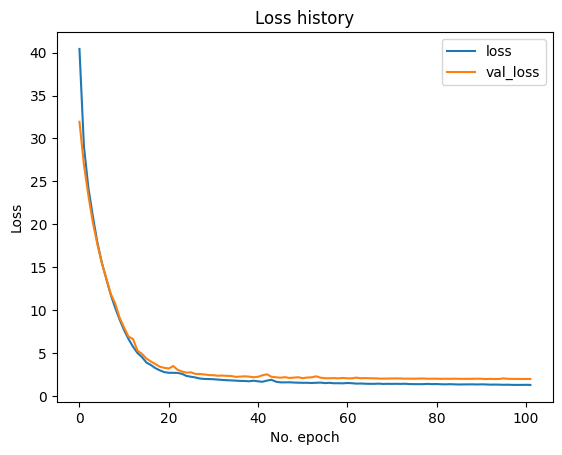

In [12]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('Loss history')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

# # Plot history: Accuracy
# plt.plot(history.history['val_accuracy'])
# plt.title('Validation accuracy history')
# plt.ylabel('Accuracy value (%)')
# plt.xlabel('No. epoch')
# plt.show()

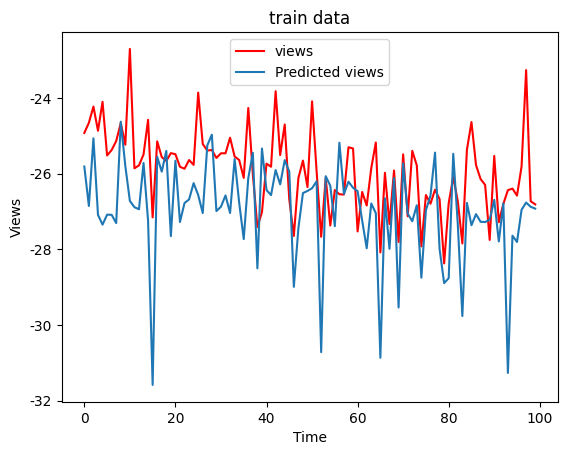

In [13]:
import matplotlib.pyplot as plt
pred = model.predict(input_train) #訓練好model使用predict預測看看在訓練的model跑的回歸線

plt.plot(target_train[:100],'red' ,label='views')#畫出回歸線
plt.plot(pred[:100],label='Predicted views')
#plt.plot(x_train, y_train, 'o') #畫出原本的點
plt.title('train data')
plt.xlabel('Time')
plt.ylabel('Views')
plt.legend()
plt.show()

In [14]:
import time
struct_time = time.strptime("2022-12-08 22:00:00", "%Y-%m-%d %H:%M:%S")
time_stop = int(time.mktime(struct_time))

import matplotlib.pyplot as plt
pred = model.predict([input_train]) #訓練好model使用predict預測看看在訓練的model跑的回歸線
for i in range(0, len(target_train)):
    time_ord = time.strptime(img_list['publishedAt'][i], "%Y-%m-%d %H:%M:%S")
    time_now = int(time.mktime(time_ord))
    timetonow = time_stop - time_now
    target_train[i] = (2**(target_train[i]-1))*timetonow*img_list['subscriberCount'][i]
    pred[i] = (2**(pred[i]-1))*timetonow*img_list['subscriberCount'][i]

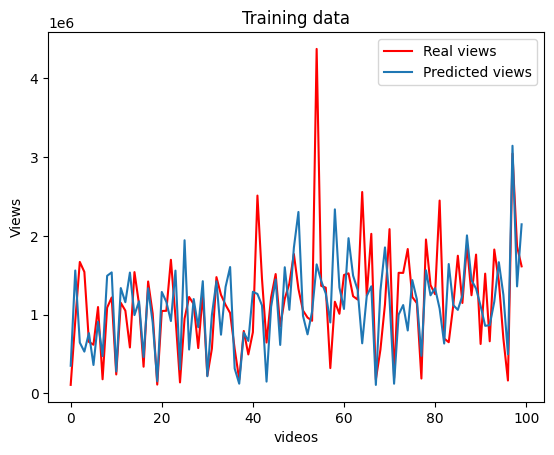

In [23]:
plt.plot(target_train[700:800],'red' ,label='Real views')#畫出回歸線
plt.plot(pred[700:800],label='Predicted views')
#plt.plot(x_train, y_train, 'o') #畫出原本的點
plt.title('Training data')
plt.xlabel('videos')
plt.ylabel('Views')
plt.legend()
plt.show()

In [14]:
# save model
model.save('LSTM-1.94.h5')